In [14]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import * 

In [2]:
wifidf = pd.read_csv('trainingData.csv')

In [4]:
# data understanding: now we'll have a look at structure, plots and statistics of our variables

In [5]:
wifidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [6]:
wifidf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
wifidf.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
# first, we'll convert latitude and longitude to proper UTM coordinate to be able to understand it in the real world. 
# However for our predictions we'll need to keep it as it is

In [7]:
wifidf['LONGITUDE'] = wifidf['LONGITUDE'] * 100

In [8]:
wifidf['LONGITUDE'] = round(wifidf['LONGITUDE'], 1)

In [9]:
wifidf['LONGITUDE']

0       -754126.4
1       -753662.1
2       -751915.2
3       -752457.0
4       -763214.4
           ...   
19932   -748546.9
19933   -739062.1
19934   -751684.1
19935   -753732.2
19936   -753616.6
Name: LONGITUDE, Length: 19937, dtype: float64

In [10]:
wifidf['LATITUDE'] = round(wifidf['LATITUDE'],1)

In [11]:
wifidf['LATITUDE']

0        4864920.8
1        4864934.2
2        4864949.5
3        4864934.1
4        4864982.2
           ...    
19932    4864874.7
19933    4864836.1
19934    4864889.3
19935    4864895.8
19936    4864897.9
Name: LATITUDE, Length: 19937, dtype: float64

In [12]:
wifidf['LATITUDE'].describe()

count    1.993700e+04
mean     4.864871e+06
std      6.693279e+01
min      4.864746e+06
25%      4.864821e+06
50%      4.864852e+06
75%      4.864930e+06
max      4.865017e+06
Name: LATITUDE, dtype: float64

In [13]:
wifidf['LONGITUDE'].describe()

count     19937.000000
mean    -746427.592030
std       12340.201917
min     -769133.800000
25%     -759473.700000
50%     -742306.100000
75%     -735919.300000
max     -730081.900000
Name: LONGITUDE, dtype: float64

In [14]:
# here we see that we don't have an even distribution of our data points, which could be interesting for further steps

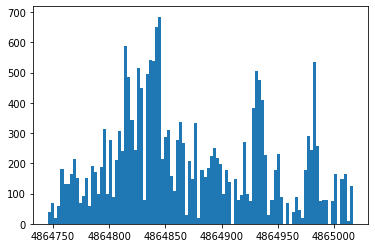

In [15]:
plt.hist(wifidf['LATITUDE'], bins = 100)
plt.show()

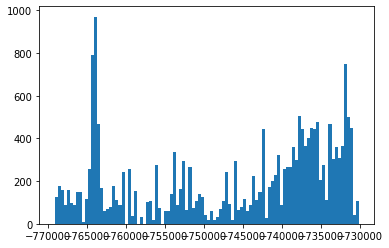

In [17]:
plt.hist(wifidf['LONGITUDE'], bins = 100)
plt.show()

In [18]:
# and here we'll plot all the datapoints:

In [19]:
x = wifidf['LONGITUDE']
y = wifidf['LATITUDE']

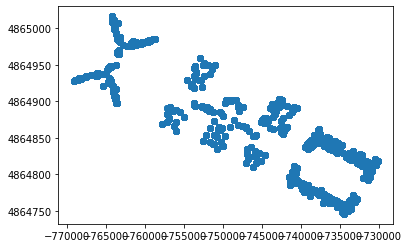

In [20]:
plt.scatter(x,y)
plt.show()

In [21]:
# we can see that it corresponds with the following image from real life:

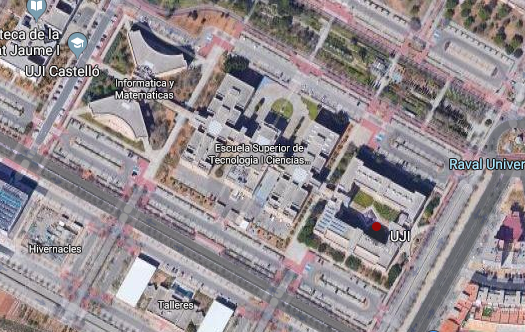

In [22]:
from IPython.display import Image
Image(filename='Captura.png') 

In [23]:
# in the photo we see 3 buildings, which correspond easily with the 0 (Informática y Matemáticas), 1 (Escuela Superior de
# Tecnología...) and 2 (UJI central) buildings in our dataset. This gives us the hint that if we split the dataset in 3 
# buildings, the predictions might get easier

In [16]:
BUILDING0 = wifidf[wifidf.BUILDINGID == 0]

In [17]:
x = BUILDING0['LONGITUDE']
y = BUILDING0['LATITUDE']

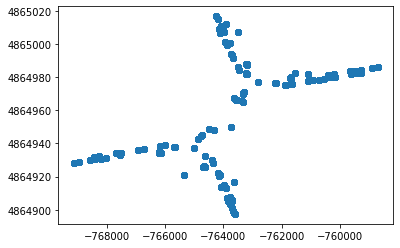

In [18]:
plt.scatter(x,y)
plt.show()

In [27]:
BUILDING1 = wifidf[wifidf.BUILDINGID == 1]

In [28]:
x = BUILDING1['LONGITUDE']
y = BUILDING1['LATITUDE']

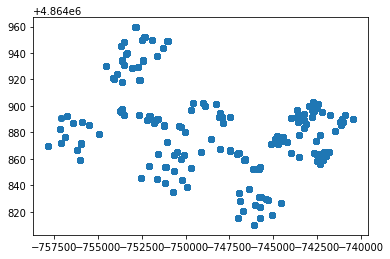

In [29]:
plt.scatter(x,y)
plt.show()

In [30]:
BUILDING2 = wifidf[wifidf.BUILDINGID == 2]

In [31]:
x = BUILDING2['LONGITUDE']
y = BUILDING2['LATITUDE']

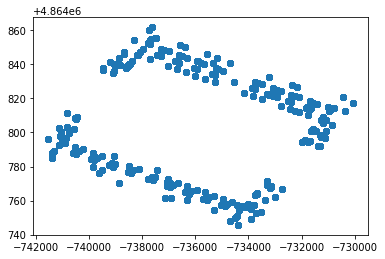

In [32]:
plt.scatter(x,y)
plt.show()

In [33]:
BUILDING0.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,5249.000000,5249.000000,5249.0,5249.0,5249.0,5249.0,5249.000000,5249.000000,5249.000000,5249.0,...,5249.0,5249.000000,5.249000e+03,5249.000000,5249.0,5249.000000,5249.000000,5249.000000,5249.000000,5.249000e+03
mean,99.330158,99.319870,100.0,100.0,100.0,100.0,79.997142,95.665079,79.846256,100.0,...,100.0,-763931.152124,4.864958e+06,1.603163,0.0,167.989903,1.994475,5.785673,13.521433,1.370588e+09
std,11.420280,11.285783,0.0,0.0,0.0,0.0,56.996244,28.233764,56.475653,0.0,...,0.0,2495.050065,3.268804e+01,1.083094,0.0,51.158690,0.074131,4.995880,0.499588,4.862150e+05
min,-97.000000,-90.000000,100.0,100.0,100.0,100.0,-99.000000,-97.000000,-98.000000,100.0,...,100.0,-769133.800000,4.864898e+06,0.000000,0.0,101.000000,1.000000,1.000000,13.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-764853.000000,4.864932e+06,1.000000,0.0,118.000000,2.000000,1.000000,13.000000,1.370013e+09
50%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-763935.000000,4.864950e+06,2.000000,0.0,140.000000,2.000000,1.000000,14.000000,1.370879e+09
75%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-763189.500000,4.864983e+06,3.000000,0.0,218.000000,2.000000,11.000000,14.000000,1.371051e+09
max,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-758704.100000,4.865017e+06,3.000000,0.0,241.000000,2.000000,11.000000,14.000000,1.371057e+09


In [34]:
BUILDING1.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,5196.0,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.0,5196.000000,5196.0,5196.000000,...,5196.0,5196.000000,5.196000e+03,5196.000000,5196.0,5196.000000,5196.000000,5196.000000,5196.000000,5.196000e+03
mean,100.0,100.0,100.0,100.0,100.0,90.007313,100.0,80.667436,100.0,96.791378,...,100.0,-748867.938587,4.864884e+06,1.370285,1.0,133.131062,1.684950,10.308507,12.675135,1.371718e+09
std,0.0,0.0,0.0,0.0,0.0,41.921917,0.0,55.948088,0.0,24.595335,...,0.0,4963.355266,3.626641e+01,1.060587,0.0,79.527892,0.464581,4.612793,5.759131,5.932042e+03
min,100.0,100.0,100.0,100.0,100.0,-96.000000,100.0,-98.000000,100.0,-99.000000,...,100.0,-757846.200000,4.864810e+06,0.000000,1.0,1.000000,1.000000,2.000000,1.000000,1.371709e+09
25%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-753367.100000,4.864863e+06,0.000000,1.0,102.000000,1.000000,7.000000,7.000000,1.371715e+09
50%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-749103.100000,4.864881e+06,1.000000,1.0,111.000000,2.000000,10.000000,14.000000,1.371716e+09
75%,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-743962.400000,4.864902e+06,2.000000,1.0,206.000000,2.000000,14.000000,17.000000,1.371720e+09
max,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.000000,...,100.0,-740449.200000,4.864960e+06,3.000000,1.0,249.000000,2.000000,18.000000,23.000000,1.371738e+09


In [35]:
BUILDING2.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,9492.0,9492.0,9492.0,9492.0,9492.000000,9492.000000,9492.0,9492.0,9492.0,9492.0,...,9492.0,9492.000000,9.492000e+03,9492.000000,9492.0,9492.000000,9492.000000,9492.000000,9492.000000,9.492000e+03
mean,100.0,100.0,100.0,100.0,99.188685,99.442899,100.0,100.0,100.0,100.0,...,100.0,-735412.397377,4.864816e+06,1.880636,2.0,145.988201,1.824800,10.204067,12.935419,1.371720e+09
std,0.0,0.0,0.0,0.0,12.472991,10.245218,0.0,0.0,0.0,0.0,...,0.0,2982.156970,2.809557e+01,1.334868,0.0,43.531476,0.380158,4.328636,6.472813,3.239645e+03
min,100.0,100.0,100.0,100.0,-97.000000,-98.000000,100.0,100.0,100.0,100.0,...,100.0,-741516.300000,4.864746e+06,0.000000,2.0,101.000000,1.000000,2.000000,1.000000,1.371710e+09
25%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.0,-737707.800000,4.864795e+06,1.000000,2.0,115.000000,2.000000,6.000000,7.000000,1.371717e+09
50%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.0,-735567.000000,4.864821e+06,2.000000,2.0,129.000000,2.000000,11.000000,13.000000,1.371721e+09
75%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.0,-732523.400000,4.864838e+06,3.000000,2.0,201.000000,2.000000,14.000000,19.000000,1.371722e+09
max,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,...,100.0,-730081.900000,4.864862e+06,4.000000,2.0,254.000000,2.000000,18.000000,24.000000,1.371725e+09


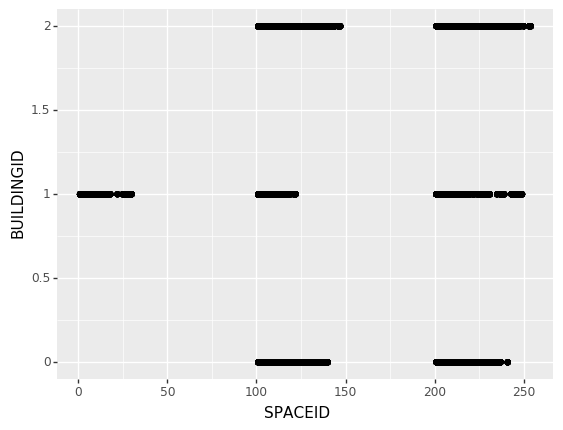

<ggplot: (-9223371959204223400)>

In [38]:
(ggplot(wifidf, aes(x = 'SPACEID', y = 'BUILDINGID')) + geom_point())

In [3]:
WAPcols = wifidf.columns[0:520]

In [4]:
WAPcols

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517',
       'WAP518', 'WAP519', 'WAP520'],
      dtype='object', length=520)

In [5]:
WAPvalues = wifidf[WAPcols].to_numpy()

In [6]:
WAPvalues

array([[100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       ...,
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100]], dtype=int64)

In [ ]:
plt.hist(WAPvalues, bins = 204)
plt.show()

In [24]:
WAPvalues.max()

100

In [25]:
WAPvalues.min()

-104

In [26]:
WAPvalues.mean()

93.82302377489091

In [10]:
unique_elements, counts_elements = np.unique(WAPvalues, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    -104     -103     -102     -101     -100      -99      -98      -97
       -96      -95      -94      -93      -92      -91      -90      -89
       -88      -87      -86      -85      -84      -83      -82      -81
       -80      -79      -78      -77      -76      -75      -74      -73
       -72      -71      -70      -69      -68      -67      -66      -65
       -64      -63      -62      -61      -60      -59      -58      -57
       -56      -55      -54      -53      -52      -51      -50      -49
       -48      -47      -46      -45      -44      -43      -42      -41
       -40      -39      -38      -37      -36      -35      -34      -33
       -32      -31      -30      -29      -28      -27      -26      -25
       -24      -22      -18      -17      -16      -15      -14      -13
       -12      -11      -10       -9       -8       -7       -6       -5
        -3       -2       -1        0      100]
 [       4        2       19       70      239      577     1207

In [28]:
sum(counts_elements)

10367240

In [11]:
len(WAPvalues[WAPvalues == 100])

10008477

In [12]:
len(WAPvalues[WAPvalues == 100]) / sum(counts_elements) * 100

96.5394550526466

In [11]:
WAPwo100 = WAPvalues[WAPvalues != 100]

In [18]:
scipy.stats.describe(WAPwo100)

DescribeResult(nobs=358763, minmax=(-104, 0), mean=-78.4972112508815, variance=159.15735211604493, skewness=1.1555479429644886, kurtosis=1.8886882315724582)

In [17]:
len(WAPvalues[WAPvalues < -78,])/len(WAPwo100)

0.5910670832833932

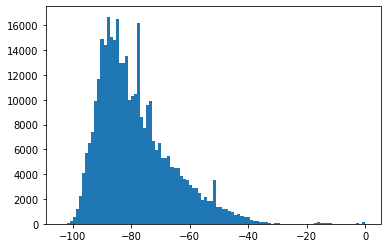

In [50]:
plt.hist(WAPwo100, bins = 100)
plt.show()

In [52]:
WAPvalues[WAPvalues != 100,]

array([-67, -68, -68, ..., -91, -90, -86], dtype=int64)

In [51]:
len(WAPwo100)

358763

In [53]:
print(wifidf.sort_values(by = ['LATITUDE']))

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
4718      100     100     100     100     100     100     100     100     100   
5027      100     100     100     100     100     100     100     100     100   
5932      100     100     100     100     100     100     100     100     100   
5715      100     100     100     100     100     100     100     100     100   
6147      100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
8126      100     100     100     100     100     100     100     100     100   
17470     100     100     100     100     100     100     100     100     100   
10388     100     100     100     100     100     100     100     100     100   
17896     100     100     100     100     100     100     100     100     100   
17028     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP520 

In [54]:
wifidf['LATITUDE'].value_counts()

4864837.9    273
4864841.8    192
4864845.6    179
4864807.6    171
4864837.3    154
            ... 
4864853.6      8
4864863.3      8
4864811.9      8
4864887.3      7
4864890.5      3
Name: LATITUDE, Length: 514, dtype: int64

In [55]:
wifidf['LONGITUDE'].value_counts()

-736745.9    135
-731266.2    131
-737280.3    128
-736049.7    124
-731191.9    116
            ... 
-742475.3      8
-751156.3      8
-751791.3      7
-746152.4      7
-757107.1      3
Name: LONGITUDE, Length: 668, dtype: int64

In [56]:
wifidf['FLOOR'].value_counts()

3    5048
1    5002
2    4416
0    4369
4    1102
Name: FLOOR, dtype: int64

In [57]:
wifidf['BUILDINGID'].value_counts()

2    9492
0    5249
1    5196
Name: BUILDINGID, dtype: int64

In [23]:
onlyWAP = wifidf.iloc[:, 0:520]

In [24]:
WAPsums = onlyWAP.sum(axis=1)

In [25]:
WAPsums

0        48980
1        49174
2        49256
3        49159
4        52000
         ...  
19932    50705
19933    49012
19934    50842
19935    49041
19936    49023
Length: 19937, dtype: int64

In [26]:
noconnectionrows = WAPsums[WAPsums == 52000]

In [30]:
print(noconnectionrows.index)

Int64Index([    4,    83,  3791,  4636,  4639,  4645,  4649,  4655,  4666,
             4685,  4701,  4716,  4721,  4723,  4738,  4740,  4745,  4755,
             4756,  4758,  4777,  4793,  4798,  4803,  4812,  4826,  4849,
             4855,  4856,  4880,  4884,  4901,  4906,  4908,  4914,  4928,
             4929,  4931,  4966,  4981,  4982,  5005,  5031,  5045,  5046,
             5055,  5058,  5060,  5065,  5081,  5094,  5095,  5097,  5098,
             5101,  5108,  5109,  5110,  5114,  5116,  5127,  5134, 18654,
            18744, 18745, 18746, 19278, 19282, 19369, 19387, 19410, 19427,
            19430, 19443, 19448, 19469],
           dtype='int64')


In [66]:
wifidf.iloc[noconnectionrows.index,]

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
4,100,100,100,100,100,100,100,100,100,100,...,100,-763214.4,4864982.2,0,0,122,2,11,13,1369909710
83,100,100,100,100,100,100,100,100,100,100,...,100,-736675.1,4864837.2,2,2,121,1,11,13,1371724142
3791,100,100,100,100,100,100,100,100,100,100,...,100,-736624.2,4864841.1,1,2,118,2,7,6,1371724280
4636,100,100,100,100,100,100,100,100,100,100,...,100,-752435.1,4864934.5,3,1,102,2,8,1,1371714326
4639,100,100,100,100,100,100,100,100,100,100,...,100,-752486.4,4864950.2,3,1,103,1,8,1,1371714519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19427,100,100,100,100,100,100,100,100,100,100,...,100,-752067.6,4864892.4,3,1,3,2,17,22,1371714981
19430,100,100,100,100,100,100,100,100,100,100,...,100,-746992.2,4864864.4,3,1,6,2,17,22,1371715175
19443,100,100,100,100,100,100,100,100,100,100,...,100,-752067.6,4864892.4,3,1,3,2,17,22,1371714982
19448,100,100,100,100,100,100,100,100,100,100,...,100,-746992.2,4864864.4,3,1,6,2,17,22,1371715176


In [83]:
wifidf.loc[wifidf.iloc[noconnectionrows.index,], 'isconnection'] = 'NO'

KeyError: "None of [Index([                                                  ('W', 'A', 'P', '0', '0', '1'),\n                                                         ('W', 'A', 'P', '0', '0', '2'),\n                                                         ('W', 'A', 'P', '0', '0', '3'),\n                                                         ('W', 'A', 'P', '0', '0', '4'),\n                                                         ('W', 'A', 'P', '0', '0', '5'),\n                                                         ('W', 'A', 'P', '0', '0', '6'),\n                                                         ('W', 'A', 'P', '0', '0', '7'),\n                                                         ('W', 'A', 'P', '0', '0', '8'),\n                                                         ('W', 'A', 'P', '0', '0', '9'),\n                                                         ('W', 'A', 'P', '0', '1', '0'),\n       ...\n                                                         ('W', 'A', 'P', '5', '2', '0'),\n                                          ('L', 'O', 'N', 'G', 'I', 'T', 'U', 'D', 'E'),\n                                               ('L', 'A', 'T', 'I', 'T', 'U', 'D', 'E'),\n                                                              ('F', 'L', 'O', 'O', 'R'),\n                                     ('B', 'U', 'I', 'L', 'D', 'I', 'N', 'G', 'I', 'D'),\n                                                    ('S', 'P', 'A', 'C', 'E', 'I', 'D'),\n       ('R', 'E', 'L', 'A', 'T', 'I', 'V', 'E', 'P', 'O', 'S', 'I', 'T', 'I', 'O', 'N'),\n                                                         ('U', 'S', 'E', 'R', 'I', 'D'),\n                                                    ('P', 'H', 'O', 'N', 'E', 'I', 'D'),\n                                          ('T', 'I', 'M', 'E', 'S', 'T', 'A', 'M', 'P')],\n      dtype='object', length=529)] are in the [index]"